In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA


In [9]:
df = pd.read_excel("/content/sample_data/cleaned_stock_details_5_years.xlsx")
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(by='Date')
df.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Company
0,2018-11-29 05:00:00,68.673458,69.589358,68.673458,69.001251,2625800,0.0,0.0,A
477215,2018-11-29 05:00:00,132.538203,134.532268,132.069959,133.710434,1713000,0.0,0.0,NaN
475957,2018-11-29 05:00:00,15.000000,15.146000,14.625100,14.904000,11335000,0.0,0.0,NaN
68217,2018-11-29 05:00:00,31.753208,31.915178,31.450394,31.675745,2985223,0.0,0.0,NaN
474699,2018-11-29 05:00:00,48.835189,49.084842,48.702308,48.802975,3097540,0.0,0.0,NaN


In [10]:
apple_df = df[df['Company'] == 'AAPL']
apple_df.set_index('Date', inplace=True)
price_series = apple_df['Close']
price_series.head()


,Close
Date,
2018-11-29 05:00:00,43.083508
2018-11-30 05:00:00,42.850754
2018-12-03 05:00:00,44.348064
2018-12-04 05:00:00,42.397247
2018-12-06 05:00:00,41.924541


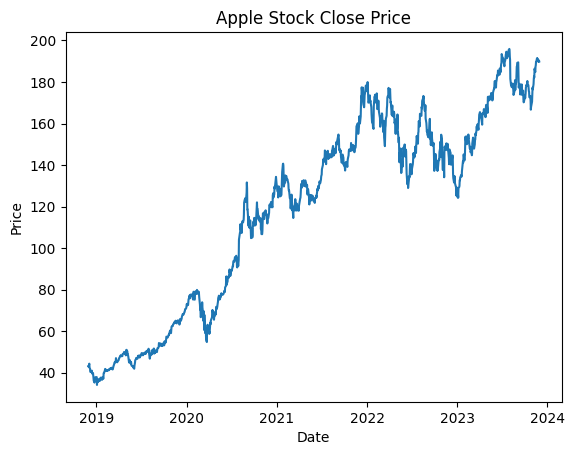

In [11]:
plt.figure()
plt.plot(price_series)
plt.title("Apple Stock Close Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()


In [12]:
log_returns = np.log(price_series).diff().dropna()
log_returns.head()


,Close
Date,
2018-11-30 05:00:00,-0.005417
2018-12-03 05:00:00,0.034346
2018-12-04 05:00:00,-0.044986
2018-12-06 05:00:00,-0.011212
2018-12-07 05:00:00,-0.036308


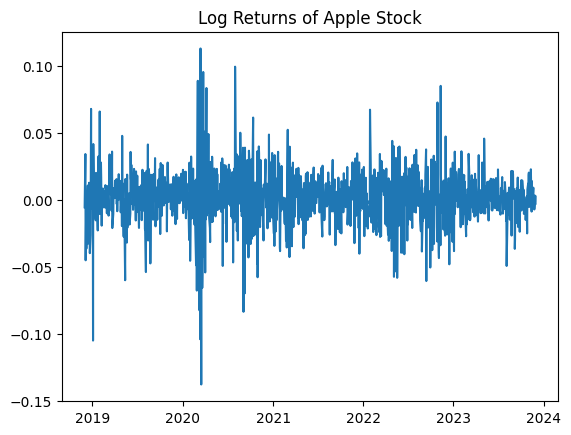

In [13]:
plt.figure()
plt.plot(log_returns)
plt.title("Log Returns of Apple Stock")
plt.show()


In [14]:
adf_result = adfuller(log_returns)
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])


ADF Statistic: -10.952988871319397
p-value: 8.702564601637606e-20


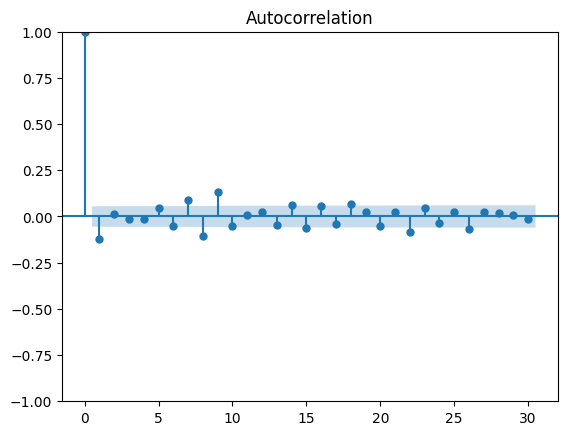

In [15]:
plot_acf(log_returns, lags=30)
plt.show()


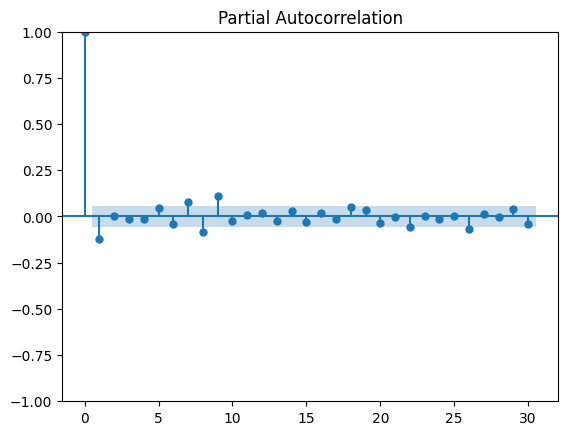

In [16]:
plot_pacf(log_returns, lags=30)
plt.show()


In [17]:
ar_model = ARIMA(log_returns, order=(2, 0, 0))
ar_result = ar_model.fit()
ar_result.summary()


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 1257
Model:                 ARIMA(2, 0, 0)   Log Likelihood                3107.880
Date:                Fri, 06 Feb 2026   AIC                          -6207.760
Time:                        06:18:08   BIC                          -6187.214
Sample:                             0   HQIC                         -6200.038
                               - 1257                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0012      0.001      2.197      0.028       0.000       0.002
ar.L1         -0.1224      0.019     -6.383      0.000      -0.160      -0.085
ar.L2          0.0003      0.018      0.015      0.988      -0.036       0.036
sigma2         0.0004   9.85e-06     42.294      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              1069.85
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.64   Skew:                            -0.29
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [18]:
ma_model = ARIMA(log_returns, order=(0, 0, 2))
ma_result = ma_model.fit()
ma_result.summary()


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 1257
Model:                 ARIMA(0, 0, 2)   Log Likelihood                3107.853
Date:                Fri, 06 Feb 2026   AIC                          -6207.705
Time:                        06:18:10   BIC                          -6187.159
Sample:                             0   HQIC                         -6199.983
                               - 1257                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0012      0.001      2.182      0.029       0.000       0.002
ma.L1         -0.1220      0.019     -6.323      0.000      -0.160      -0.084
ma.L2          0.0111      0.018      0.621      0.535      -0.024       0.046
sigma2         0.0004   9.85e-06     42.292      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              1071.94
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.64   Skew:                            -0.29
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.49
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [19]:
print("AR Model AIC:", ar_result.aic)
print("AR Model BIC:", ar_result.bic)

print("MA Model AIC:", ma_result.aic)
print("MA Model BIC:", ma_result.bic)


AR Model AIC: -6207.759786160888
AR Model BIC: -6187.213853326527
MA Model AIC: -6207.70520093818
MA Model BIC: -6187.159268103818


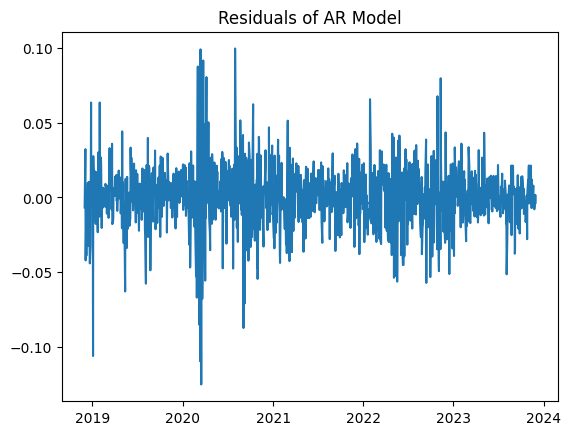

In [20]:
residuals = ar_result.resid

plt.figure()
plt.plot(residuals)
plt.title("Residuals of AR Model")
plt.show()


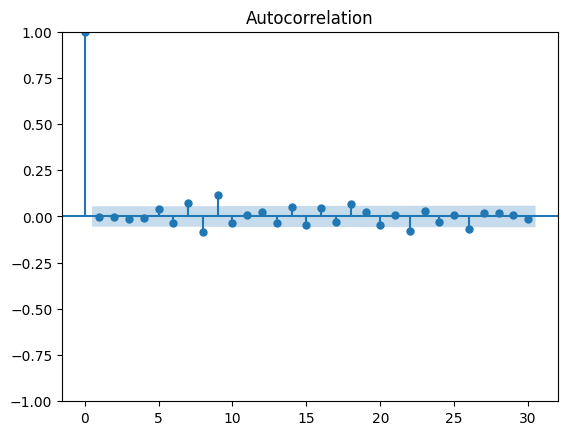

In [21]:
plot_acf(residuals, lags=30)
plt.show()
